# Anyone AI - Project III

# Home Credit Default Risk


You've been learning a lot about Machine Learning Algorithms, now we you're gonna be asked to put it all togheter. 

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

## 1. Introduction

This is a binary Classification task: we want to predict whether the person applying for a home credit will be able to repay its debt or not.

The dataset is composed of multiple files with different information about loands taken. In this project we're going to exclusively work with the main files: application_train.csv and application_test.csv.

We will use [Area Under the ROC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419) as the evaluation metric, so our models will have to return the probabilities that a loan is not paid for each row.

### Getting the data

To access the data for this project, you only need to execute the code below. This will download three files:

- `application_train.csv`: Training dataset you must use to train and find the best hyperparameters on your model.
- `application_test.csv`: Test dataset, use it only when you are done choosing the model and the parameters.
- `HomeCredit_columns_description.csv`: This file contains descriptions for the columns in train and test datasets.


**Don't change anything in this cell, just make it run correctly**

In [13]:
#!pip install gdown

!gdown 1CAhmDRZLsIX1rYmUHOI8n2oatGQKGeHt
!gdown 1jXsI16FglcBCKID1c5Us-WD758D6mWMD
!gdown 1i96_nh9tU0YeQtbLGusjZxVp3cBctDGp

Downloading...
From: https://drive.google.com/uc?id=1CAhmDRZLsIX1rYmUHOI8n2oatGQKGeHt
To: e:\OneDrive\Escritorio\anyoneAI\Sprint3\Sprint_Project\Project files\V3\application_test.csv

  0%|          | 0.00/50.2M [00:00<?, ?B/s]
  1%|          | 524k/50.2M [00:00<00:13, 3.71MB/s]
  4%|▍         | 2.10M/50.2M [00:00<00:05, 8.37MB/s]
  6%|▋         | 3.15M/50.2M [00:00<00:05, 8.11MB/s]
  9%|▉         | 4.72M/50.2M [00:07<01:48, 419kB/s] 
 10%|█         | 5.24M/50.2M [00:09<01:56, 387kB/s]
 14%|█▎        | 6.82M/50.2M [00:09<01:03, 677kB/s]
 17%|█▋        | 8.39M/50.2M [00:10<00:39, 1.07MB/s]
 20%|█▉        | 9.96M/50.2M [00:10<00:25, 1.58MB/s]
 23%|██▎       | 11.5M/50.2M [00:10<00:17, 2.24MB/s]
 25%|██▌       | 12.6M/50.2M [00:10<00:13, 2.71MB/s]
 28%|██▊       | 14.2M/50.2M [00:10<00:09, 3.65MB/s]
 31%|███▏      | 15.7M/50.2M [00:10<00:07, 4.71MB/s]
 33%|███▎      | 16.8M/50.2M [00:10<00:06, 5.39MB/s]
 36%|███▌      | 17.8M/50.2M [00:10<00:05, 6.01MB/s]
 39%|███▊      | 19.4M/50.2M [00:

1.1. Load the training and test datasets using pandas `read_csv()` function. Assign them to `app_train` and `app_test` variables respectively.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lightgbm as lgb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
sns.set()

In [15]:
### Complete in this cell: Loading the dataset
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

**Don't change anything in this cell, just make it run correctly**

In [16]:
if app_train.shape == (215257, 123):
  print('Success: app_train shape is correct!')
else:
  raise ValueError('Train dataset shape is incorrect, please review your code')

if isinstance(app_train, pd.DataFrame):
  print('Success: app_train type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if app_test.shape == (92254, 123):
  print('Success: app_test shape is correct!')
else:
  raise ValueError('Test dataset shape is incorrect, please review your code')

if isinstance(app_test, pd.DataFrame):
  print('Success: app_test type is correct!')
else:
  raise ValueError('Test dataset type is incorrect, please review your code')

Success: app_train shape is correct!
Success: app_train type is correct!
Success: app_test shape is correct!
Success: app_test type is correct!


### Exploratory Data Analysis

A lot of the analysis of the data can be found on public available Kaggle kernels or blog posts, but you need to make sure you understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

1.2. Print how many samples do we have in our train and test datasets.

In [17]:
### Complete in this cell: shape of the dataset
print(f'The train dataset has {app_train.shape[0]} rows and {app_train.shape[1]} columns')
print(f'The test dataset has: {app_test.shape[0]} rows and {app_test.shape[1]} columns')

The train dataset has 215257 rows and 123 columns
The test dataset has: 92254 rows and 123 columns


1.3. List all columns in the train dataset.

In [18]:
### Complete in this cell: Show all columns in the training dataset 
print(app_train.columns.tolist())

['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONA

1.4. Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows, make sure all features are visualized. Take your time to review what kind of information you can gather from this data.

In [19]:
### Complete in this cell: show first 5 records in a transposed table
pd.set_option("display.max_rows", 123)
app_train.head(5).transpose()

,0,1,2,3,4
Unnamed: 0,187399,84777,268140,270686,33785
SK_ID_CURR,317244,198357,410700,413785,139141
TARGET,0,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,F,M,F,F,F
FLAG_OWN_CAR,Y,N,N,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,1,0,0,0,0
AMT_INCOME_TOTAL,202500.0,135000.0,135000.0,202500.0,54000.0
AMT_CREDIT,640080.0,647046.0,1078200.0,1223010.0,97038.0


1.5. Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

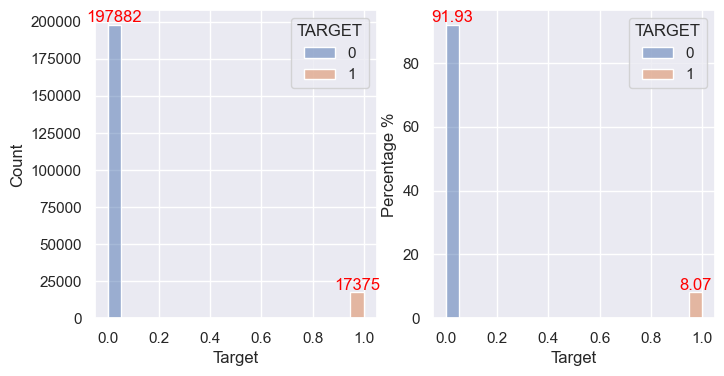

In [20]:
### Complete in this cell: show distribution of target variable
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
p1 = sns.histplot(data=app_train, x='TARGET', hue='TARGET', ax=ax1, )
labels1 = [str(v) if v else '' for v in p1.containers[0].datavalues]
labels2 = [str(v) if v else '' for v in p1.containers[1].datavalues]
p1.bar_label(p1.containers[0], labels=labels1, label_type='edge', color='red')
p1.bar_label(p1.containers[1], labels=labels2, label_type='edge', color='red')
p1.set(xlabel='Target', ylabel='Count')

p2 = sns.histplot(data=app_train, x='TARGET', hue='TARGET', stat='percent', ax=ax2)
labels3 = [str(round(v,2)) if v else '' for v in p2.containers[0].datavalues]
labels4 = [str(round(v,2)) if v else '' for v in p2.containers[1].datavalues]
p2.bar_label(p2.containers[0], labels=labels3, label_type='edge', color='red')
p2.bar_label(p2.containers[1], labels=labels4, label_type='edge', color='red')
p2.set(xlabel='Target', ylabel='Percentage %')

plt.show()


1.6. Show the number of columns of each data type.

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
float64    45
int64      32
object     10
```

In [21]:
### Complete in this cell: show number of columns per data type
app_train.dtypes.value_counts()

float64    65
int64      42
object     16
dtype: int64

1.7. For categorical variables, show the number of distinct values in each column (number of labels).

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
NAME_CONTRACT_TYPE             5
CODE_GENDER                    2
FLAG_OWN_CAR                   1
FLAG_OWN_REALTY                1
...
```

In [22]:
### Complete in this cell: show number of unique values per categorical column
app_train.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

1.8. Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

Just for giving you an idea, the output should look like this (not exactly the same numbers and columns names):

```python
                   Total   Percent
COMMONAREA_AVG    121000      85.2
COMMONAREA_MODE   121000      76.6
COMMONAREA_MEDI   121000      62.9
...
```

In [23]:
### Complete in this cell: checking missing data
total_missing_df = app_train.isnull().sum().to_frame()
total_missing_df ['Percent'] = round(total_missing_df[0]/app_train.shape[0], 2) * 100
total_missing_df = total_missing_df.rename(columns={0: 'Total'}).sort_values(ascending=False, by='Percent')
total_missing_df.head(20)

,Total,Percent
COMMONAREA_AVG,150393,70.0
COMMONAREA_MODE,150393,70.0
COMMONAREA_MEDI,150393,70.0
NONLIVINGAPARTMENTS_MODE,149483,69.0
NONLIVINGAPARTMENTS_MEDI,149483,69.0
NONLIVINGAPARTMENTS_AVG,149483,69.0
FLOORSMIN_AVG,146070,68.0
FLOORSMIN_MODE,146070,68.0
LIVINGAPARTMENTS_MODE,147144,68.0
FLOORSMIN_MEDI,146070,68.0


**Analyzing distribution of variables**

1.9. Show the distribution of credit amounts.

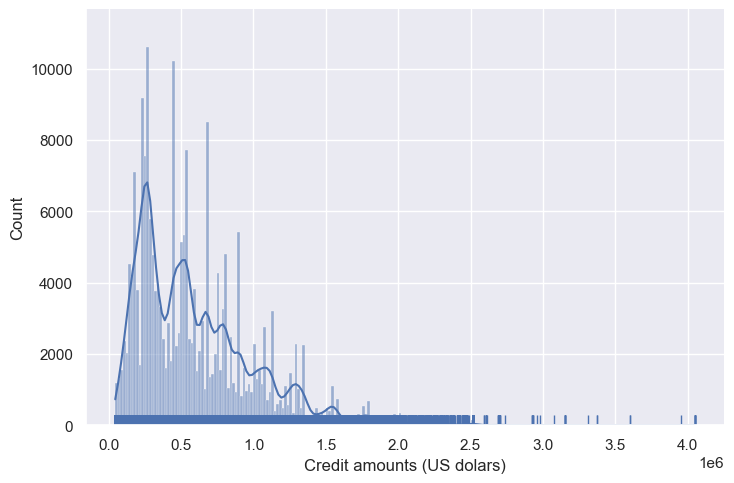

In [24]:
### Complete in this cell: distribution of credit amounts
p3 = sns.displot(data=app_train,x="AMT_CREDIT",kind="hist",aspect=1.5, kde=True, rug=True).set(xlabel='Credit amounts (US dolars)')

1.10. Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

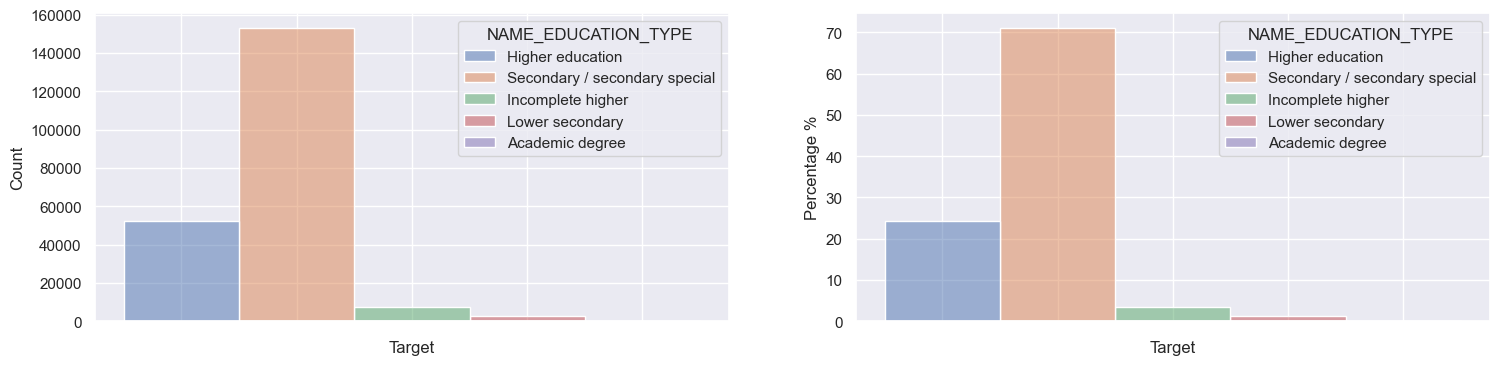

In [25]:
### Complete in this cell: level of education plot
f, (ax3, ax4) = plt.subplots(1,2, figsize=(18,4))
p4 = sns.histplot(data=app_train, x='NAME_EDUCATION_TYPE', hue='NAME_EDUCATION_TYPE', stat='count', ax=ax3, ).set(xlabel='Target', ylabel='Count', xticklabels=[])
p5 = sns.histplot(data=app_train, x='NAME_EDUCATION_TYPE', hue='NAME_EDUCATION_TYPE', stat='percent', ax=ax4).set(xlabel='Target', ylabel='Percentage %', xticklabels=[])

1.11. Plot the distribution of ocupation of the loan applicants

<AxesSubplot: xlabel='Count', ylabel='Occupation'>

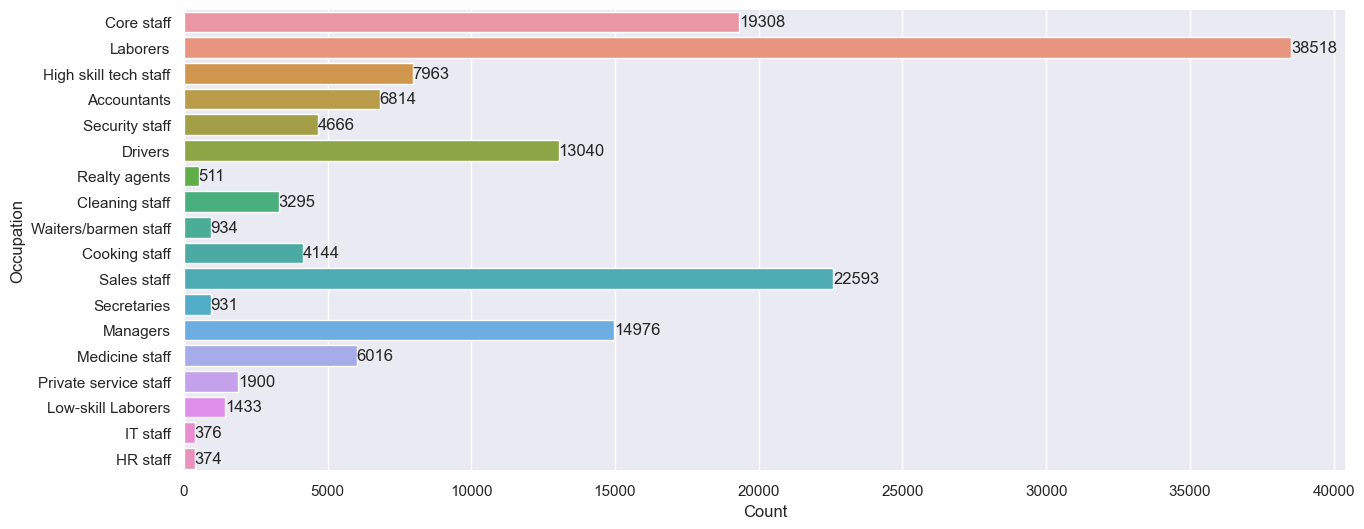

In [26]:
### Complete in this cell: ocupation of applicants
sns.set(rc = {'figure.figsize':(15,6)})
p6 = sns.countplot(data=app_train, y='OCCUPATION_TYPE')
p6.set(xlabel='Count', ylabel='Occupation')
p6.bar_label(p6.containers[0])
p6

1.12. Plot the family status of the applicants

<AxesSubplot: xlabel='Family Status', ylabel='Count'>

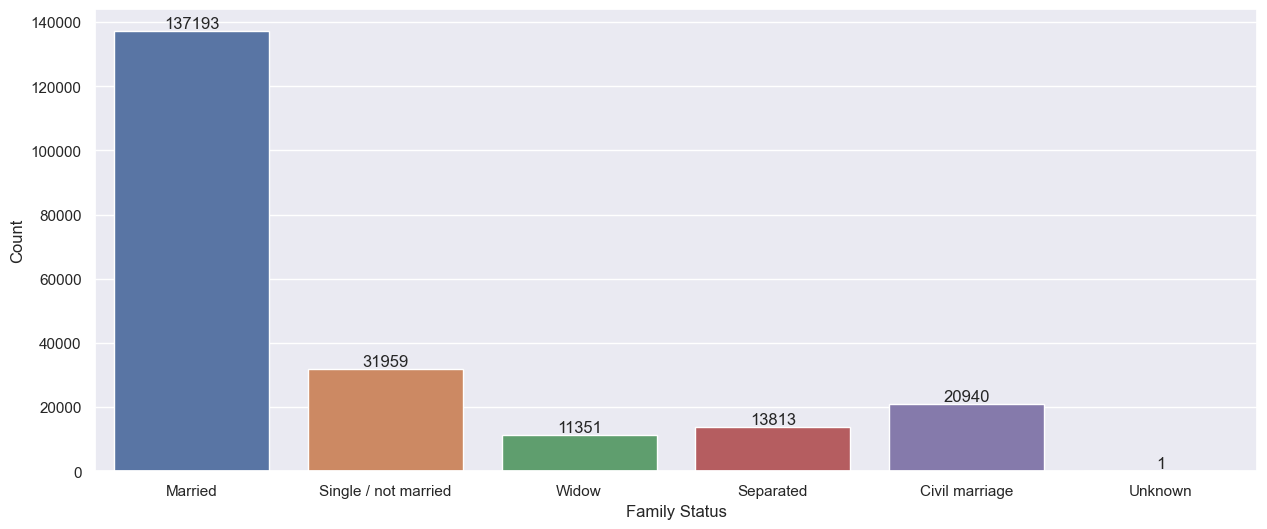

In [27]:
### Complete in this cell: family status
sns.set(rc = {'figure.figsize':(15,6)})
p7 = sns.countplot(data=app_train, x='NAME_FAMILY_STATUS')
p7.set(xlabel='Family Status', ylabel='Count')
p7.bar_label(p7.containers[0])
p7

1.13. Plot the income type of applicants grouped by the target variable

In [28]:
### Complete in this cell: income type 
app_train.NAME_INCOME_TYPE.value_counts()

Working                 111223
Commercial associate     50038
Pensioner                38737
State servant            15227
Unemployed                  13
Student                     10
Businessman                  6
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

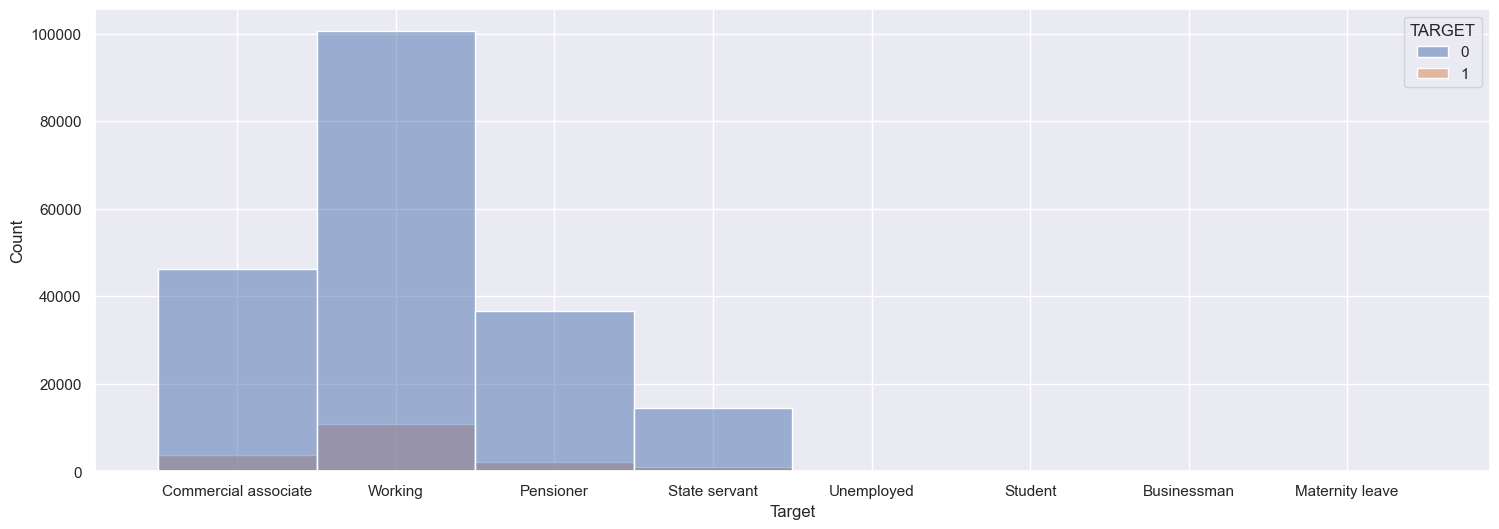

In [29]:
### Complete in this cell: Income type of applicants by target variable
f, (ax5) = plt.subplots(figsize=(18,6))
p8 = sns.histplot(data=app_train, x='NAME_INCOME_TYPE', hue='TARGET', stat='count', ax=ax5, ).set(xlabel='Target', ylabel='Count')

## 2. Preprocessing

2.1. The first step will be separate our train and test datasets columns between Features and Targets.

- Assign to `X_train` those columns from `app_train` that should be used as features for training our models.
- Assign to `y_train` the single column from `app_train` that should be used as our target (i.e. what we want to predict).
- Assign to `X_test` those columns from `app_test` that should be used as features for training our models.
- Assign to `y_test` the single column from `app_test` that should be used as our target (i.e. what we want to predict).


In [30]:
### Complete in this cell
X_train = app_train.loc[ : , app_train.columns != 'TARGET']
y_train = app_train.loc[ : , app_train.columns == 'TARGET']
X_test = app_test.loc[ : , app_train.columns != 'TARGET']
y_test = app_test.loc[ : , app_train.columns == 'TARGET']


**Don't change anything in this cell, just make it run correctly**

In [31]:
if X_train.shape == (215257, 122):
  print('Success: X_train shape is correct!')
else:
  raise ValueError('X_train dataset shape is incorrect, please review your code')

if isinstance(X_train, pd.DataFrame):
  print('Success: X_train type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if y_train.shape == (215257,) or y_train.shape == (215257, 1):
  print('Success: y_train shape is correct!')
else:
  raise ValueError('Train labels shape is incorrect, please review your code')

if X_test.shape == (92254, 122):
  print('Success: X_test shape is correct!')
else:
  raise ValueError('Test dataset shape is incorrect, please review your code')

if isinstance(X_test, pd.DataFrame):
  print('Success: X_test type is correct!')
else:
  raise ValueError('Test dataset type is incorrect, please review your code')

if y_test.shape == (92254,) or y_test.shape == (92254, 1):
  print('Success: y_test shape is correct!')
else:
  raise ValueError('Test labels shape is incorrect, please review your code')


Success: X_train shape is correct!
Success: X_train type is correct!
Success: y_train shape is correct!
Success: X_test shape is correct!
Success: X_test type is correct!
Success: y_test shape is correct!


2.2. In this section, you will code a function to make all the data pre processing for the dataset. What you have to deliver is a function that takes `X_train` and `X_test` dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns (hint: take a look at the DAYS_EMPLOYED column)
- Impute values for all columns with missing data (use median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

**Important note:** Keep in mind that you could get different number of columns in train and test because some category could only be present in one of the dataframes, this could create more one hot encoded columns. You should align train and test to have the same number of columns. Check `pandas.DataFrame.align()` function.

Complete the function `preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame)` following the instructions given above.

In [32]:
### Complete in this cell: Data pre processing function
from ast import Return


def preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame):

    """
        Pre processes data for modeling. Receives train and testing dataframes 
        for Home Credit Competition, and returns numpy ndarrays of cleaned up 
        dataframes with feature engineering already performed.
  
        Arguments:
            train_df: pd.DataFrame
            test_df: pd.DataFrame
      
        Returns:
            train_data: np.ndarrary
            test_data: np.ndarrary
    """
    # Complete this function
    col_numerical = train_df.columns[train_df.dtypes != 'object'] # Omit columns type 'object'
    col_object = train_df.columns[train_df.dtypes == 'object'] # Omit  numerical columns

    """ Outliers"""
    for column in col_numerical: # Omit columns type 'object'
        col_mean = train_df[column].mean()
        if col_mean > 1 or col_mean < -1: # Omit normalized columns
            col_q1 = np.percentile(train_df[column], 25, method = 'midpoint')
            col_q3 = np.percentile(train_df[column], 75, method = 'midpoint')
            col_IQR = col_q3-col_q1
            maximum = col_q3+1.5*col_IQR # Positive Skewness
            minimum = col_q3-1.5*col_IQR # Negative Skewness
            train_df[column] = np.where(train_df[column]< minimum, minimum, train_df[column])
            train_df[column] = np.where(train_df[column] > maximum, maximum, train_df[column])
            test_df[column] = np.where(test_df[column]< minimum, minimum, test_df[column])
            test_df[column] = np.where(test_df[column] > maximum, maximum, test_df[column])

            
    """ Impute values for all columns with missing data (use median as imputing value)"""
    """ Replacing using the median in numerical columns in train_df and test_df"""
    median_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
    median_imputer = median_imputer.fit(train_df[col_numerical])
    train_df[col_numerical] = median_imputer.transform(train_df[col_numerical])
    test_df[col_numerical] = median_imputer.transform(test_df[col_numerical])
    """ Replacing using the most frequent object type columns in train_df and test_df"""
    most_frequent_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    most_frequent_imputer = most_frequent_imputer.fit(train_df[col_object])
    train_df[col_object] = most_frequent_imputer.transform(train_df[col_object])
    test_df[col_object] = most_frequent_imputer.transform(test_df[col_object])

  
    """ Get columns with two and more than 2 categorical features """
    col_2_categories = X_train.select_dtypes(exclude=np.number).loc[:,(X_train.select_dtypes(exclude=np.number).nunique()<=2).values].columns # Binary columns
    col_grater_than2_categories = X_train.select_dtypes(exclude=np.number).loc[:,(X_train.select_dtypes(exclude=np.number).nunique()>2).values].columns # One hot encoded columns
   
    """ Encode columns with more than 2 categories (hot encodeing)"""
    encoder1 = OneHotEncoder(sparse = False)
    encoder1.fit(train_df[col_grater_than2_categories])
    train_df_hotencoded = pd.DataFrame(encoder1.transform(train_df[col_grater_than2_categories]))
    train_df_hotencoded.columns = encoder1.get_feature_names_out()
    train_df = train_df.join(train_df_hotencoded, how='left')
    test_df_hotencoded = pd.DataFrame(encoder1.transform(test_df[col_grater_than2_categories]))
    test_df_hotencoded.columns = encoder1.get_feature_names_out()
    test_df = test_df.join(test_df_hotencoded, how='left')
    train_df = train_df.drop(columns=col_grater_than2_categories)
    test_df = test_df.drop(columns=col_grater_than2_categories)
    """ Encode columns with 2 categories (binary)"""
    encoder2 = OneHotEncoder(sparse = False, drop='first')
    encoder2.fit(train_df[col_2_categories])
    train_df_hotencoded = pd.DataFrame(encoder2.transform(train_df[col_2_categories]))
    train_df_hotencoded.columns = encoder2.get_feature_names_out()
    train_df = train_df.join(train_df_hotencoded, how='left')
    test_df_hotencoded = pd.DataFrame(encoder2.transform(test_df[col_2_categories]))
    test_df_hotencoded.columns = encoder2.get_feature_names_out()
    test_df = test_df.join(test_df_hotencoded, how='left')
    train_df = train_df.drop(columns=col_2_categories)
    test_df = test_df.drop(columns=col_2_categories)


    """ Feature scaling"""
    for column in col_numerical: # Omit columns type 'object'
      col_mean = train_df[column].mean()
      if col_mean > 1 or col_mean < -1: # Omit normalized and encoded columns
        scaler_single_col = StandardScaler()
        scaler_single_col .fit(train_df[[column]])
        train_df[column] = scaler_single_col.transform(train_df[[column]])
        test_df[column] = scaler_single_col.transform(test_df[[column]])
    

    """ transform data to numpy arrays"""
    train_data = train_df.to_numpy()
    test_data = test_df.to_numpy()

    return train_data, test_data




In the following cell we are going to execute the functions you've just coded. No need to modify this.

**Important Note:** From now on, you must always use `train_data` for training your models and `test_data` only for the final evaluation of the model trained.

**Don't change anything in this cell, just make it run correctly**

In [33]:
train_data, test_data = preprocess_data(X_train, X_test)

C:\Users\marco\AppData\Local\Temp\ipykernel_4292\3314527502.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[column] = np.where(train_df[column]< minimum, minimum, train_df[column])
C:\Users\marco\AppData\Local\Temp\ipykernel_4292\3314527502.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[column] = np.where(train_df[column] > maximum, maximum, train_df[column])
C:\Users\marco\AppData\Local\Temp\ipykernel_4292\3314527502.py:35: SettingWithCopyWarning: 
A value is trying to be set o

**Don't change anything in this cell, just make it run correctly**

In [34]:
if train_data.shape == (215257, 242):
  print('Success: train_data shape is correct!')
else:
  raise ValueError('train_data dataset shape is incorrect, please review your code')

if isinstance(train_data, np.ndarray):
  print('Success: train_data type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')

if test_data.shape == (92254, 242):
  print('Success: test_data shape is correct!')
else:
  raise ValueError('test_data dataset shape is incorrect, please review your code')

if isinstance(test_data, np.ndarray):
  print('Success: test_data type is correct!')
else:
  raise ValueError('Train dataset type is incorrect, please review your code')


Success: train_data shape is correct!
Success: train_data type is correct!
Success: test_data shape is correct!
Success: test_data type is correct!


## 3. Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

**Pro tip:** It is of utmost importance to make an accurate estimation of the time required to train a machine learning model. Because of this, we recommend you to use Python [time](https://docs.python.org/3/library/time.html) library or Jupyter magic function `%%time` on the cell you're training your model to get an estimate of the time it took to fit your data.

### Baseline: LogisticRegression

3.1. Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. If you receive a warning because the algorithm failed to converge, try increasing the number of iterations or decreasing the C parameter.

Assign the trained model to `log_reg` variable.

In [35]:
### Complete in this cell: train a logistic regression, assign to `log_reg` variable
log_reg = LogisticRegression(random_state=2611)
log_reg.fit(train_data, y_train)

c:\Users\marco\AppData\Local\pypoetry\Cache\virtualenvs\anyoneai-sprint3-Od4wLTt6-py3.9\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marco\AppData\Local\pypoetry\Cache\virtualenvs\anyoneai-sprint3-Od4wLTt6-py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2611)

**Don't change anything in this cell, just make it run correctly**

In [36]:
if isinstance(log_reg, LogisticRegression):
  print('Success: Logistic regression model type is correct!')
else:
  raise ValueError('Logistic regression model type is incorrect, please review your code')

check_is_fitted(log_reg)

Success: Logistic regression model type is correct!


3.2. Use the trained model to predict probabilities for the test data.

**Important note:** When using the function `predict_proba()` for getting model probabilities you will get, for each sample, a tuple indicating the probability for class 0 and for class 1 respectively. For computing the AUC ROC score we only need the probability that the debt is not repaid (equivalent to class 1).

In [37]:
### Complete in this cell: predict test data
log_reg_proba_test = log_reg.predict_proba(test_data)[:,1]

3.3. Get AUC ROC score on test dataset. See [scikit-learn AUC ROC function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for a working implementation.

Assign the AUC ROC score to `lr_roc_auc` variable.


In [38]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `lr_roc_auc` variable.
lr_roc_auc_test = roc_auc_score(y_test, log_reg_proba_test)

In [39]:
log_reg_proba_train = log_reg.predict_proba(train_data)[:,1]
lr_roc_auc_train = roc_auc_score(y_train, log_reg_proba_train)

In [40]:
#Check for Overfitting LogisticRegression - if the training and test set AUC ROC score are quite comparable, we can say there is no overfitting, else the model is overfitting.
print('Training set score: {:.4f}'.format(lr_roc_auc_train))
print('Test set score: {:.4f}'.format(lr_roc_auc_test))

Training set score: 0.7476
Test set score: 0.7459


At this point, the model should produce a result around 0.67 

**Don't change anything in this cell, just make it run correctly**

In [41]:
if isinstance(lr_roc_auc_test, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if lr_roc_auc_test >= 0.63:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


### Training a Random Forest Classifier 

You're gonna start working in more complex models: ensambles, particularly, you're going to use the Random Forest Classifier from Scikit Learn. 

3.4. Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

Assign the trained model to `rf` variable.

In [42]:
### Complete in this cell: train a RandomForestClassifier
### Assgign to `rf`
rf = RandomForestClassifier(n_jobs=-1, random_state=2611)
rf.fit(train_data, y_train)



C:\Users\marco\AppData\Local\Temp\ipykernel_4292\3397239638.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_data, y_train)


RandomForestClassifier(n_jobs=-1, random_state=2611)

3.5. Use the classifier to predict probabilities on the test set.



In [43]:
### Complete in this cell: predict test data and store in
rf_proba_test = rf.predict_proba(test_data)[:,1]

3.6. Get AUC ROC score on test dataset.

Assign the AUC ROC score to `rf_roc_auc` variable.


In [44]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `rf_roc_auc` variable.
rf_roc_auc_test = roc_auc_score(y_test, rf_proba_test)

In [45]:
rf_proba_train = rf.predict_proba(train_data)[:,1]
rf_roc_auc_train = roc_auc_score(y_train, rf_proba_train)

In [46]:
#Check for Overfitting RandomForestClassifier - if the training and test set AUC ROC score are quite comparable, we can say there is no overfitting, else the model is overfitting
print('Training set score: {:.4f}'.format(rf_roc_auc_train))
print('Test set score: {:.4f}'.format(rf_roc_auc_test))

Training set score: 1.0000
Test set score: 0.7103


At this point, the model should produce a result around 0.7

**Don't change anything in this cell, just make it run correctly**

In [47]:
if isinstance(rf_roc_auc_test, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if rf_roc_auc_test >= 0.66:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.


3.7. Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc" (i.e. `scoring="roc_auc"`).

Assign the trained model to `rf_random` variable.

In [48]:
### Complete in this cell: Use RandomizedSearchCV to find the best combination 
### of hyperparameters for a RandomForestClassifier.
### Assign the model to `rf_random`
model_params = {
    # Number of trees in random forest - 10 Sample numbers from 200 to 2000 estimators
    'n_estimators': [int(x) for x in np.linspace(start = 4, stop = 200, num = 4)],
    # Maximum number of levels in tree
    'max_depth': [20, 40, 60, 100],
    # Minimum number of samples required to split a node - itereate 3 different values
    'min_samples_split': [2, 5, 10],
    # Minimum number of samples required at each leaf node - itereate 3 different values
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=2611, verbose=1)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=20, cv=3, random_state=2611, n_jobs=-1, verbose=1, scoring='roc_auc')
rf_randomcv = clf.fit(train_data, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\marco\AppData\Local\pypoetry\Cache\virtualenvs\anyoneai-sprint3-Od4wLTt6-py3.9\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.6min finished


In [49]:
rf_randomcv.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2611,
 'verbose': 1,
 'warm_start': False}

3.8. Use the classifier to predict probabilities on the test set.


In [50]:
### Complete in this cell: predict test data and save csv
rf_randomcv_proba_test = rf_randomcv.predict_proba(test_data)[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.4s finished


3.9. Get AUC ROC score on test dataset.

Assign the AUC ROC score to `rf_tuned_roc_auc` variable.

In [51]:
### Complete in this cell: calculate roc_auc_score.
### Assign to `rf_tuned_roc_auc` variable.
rf_tuned_roc_auc_test = roc_auc_score(y_test, rf_randomcv_proba_test )

In [52]:
rf_randomcv_proba_train = rf_randomcv.predict_proba(train_data)[:,1]
rf_tuned_roc_auc_train = roc_auc_score(y_train, rf_randomcv_proba_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.7s finished


In [53]:
#Check for Overfitting RandomizedSearchCV-RandomForestClassifier - if the training and test set AUC ROC score are quite comparable, we can say there is no overfitting, else the model is overfitting.
print('Training set score: {:.4f}'.format(rf_tuned_roc_auc_train))
print('Test set score: {:.4f}'.format(rf_tuned_roc_auc_test))

Training set score: 0.9706
Test set score: 0.7372


At this point, the model should produce a result around 0.7 or higher.

**Don't change anything in this cell, just make it run correctly**

In [54]:
if isinstance(rf_tuned_roc_auc_test, float):
  print('Success: AUC ROC score type is correct!')
else:
  raise ValueError('AUC ROC score type is incorrect, please review your code')

if rf_tuned_roc_auc_test >= 0.7:
  print('Success: AUC ROC score is correct!')
else:
  raise ValueError('AUC ROC score is incorrect, please review your code')

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


3.10. Optional: If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. This is optional, but if you, we would love to see your results.

### Optional: Training a LightGBM model 

3.11. Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [55]:
### Complete in this cell: train a LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=2611, objective='binary', n_jobs=-1)
lgb_model.fit(train_data, y_train)

c:\Users\marco\AppData\Local\pypoetry\Cache\virtualenvs\anyoneai-sprint3-Od4wLTt6-py3.9\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marco\AppData\Local\pypoetry\Cache\virtualenvs\anyoneai-sprint3-Od4wLTt6-py3.9\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(objective='binary', random_state=2611)

In [56]:
lgb_model_proba_test = lgb_model.predict_proba(test_data)[:,1]

In [57]:
lgb_model_roc_auc_test = roc_auc_score(y_test, lgb_model_proba_test )

In [58]:
lgb_model_proba_train = lgb_model.predict_proba(train_data)[:,1]
lgb_model_roc_auc_train = roc_auc_score(y_train, lgb_model_proba_train)

In [59]:
#Check for Overfitting LightGBM model - - if the training and test set AUC ROC score are quite comparable, we can say there is no overfitting, else the model is overfitting.
print('Training set score: {:.4f}'.format(lgb_model_roc_auc_train))
print('Test set score: {:.4f}'.format(lgb_model_roc_auc_test))

Training set score: 0.8032
Test set score: 0.7569


### Optional: Using Scikit Learn Pipelines 

3.12. So far you've created special functions or blocks or code to chain operations on data and then train the models. But, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

In [60]:
### Complete in this cell: use a sklearn Pipeline to automate the cleaning, standardizing and training

# Gropu columns in numerical, categorical with 2 features and categorical with more than 2 features
def column_grouper(train_pipe_df: pd.DataFrame):
    """
        Receives train and testing dataframes 
        and returns list of columns grouped in numerical, categorical with 2 features
        and cateforical with more than 2 features. 
        
        Arguments:
            train_pipe_df: pd.DataFrame
      
        Returns:
            numerical_features: list
            col_2_categories : list
            col_grater_than2_categories: list
    """
    numerical_features = train_pipe_df.select_dtypes(include='number').columns.tolist()
    col_2_categories = train_pipe_df.select_dtypes(exclude=np.number).loc[:,(train_pipe_df.select_dtypes(exclude=np.number).nunique()<=2).values].columns # Binary columns
    col_greater_than2_categories = train_pipe_df.select_dtypes(exclude=np.number).loc[:,(train_pipe_df.select_dtypes(exclude=np.number).nunique()>2).values].columns # One hot encoded columns

    return numerical_features, col_2_categories, col_greater_than2_categories

numerical_features, col_2_categories, col_greater_than2_categories = column_grouper(X_train)


# Remove outliers based on IQR Method and replace them with np.nan values
def outlier_removal_pipeline(train_pipe_df: pd.DataFrame, test_pipe_df: pd.DataFrame):

    """
        Receives train and testing dataframes 
        and returns numpy ndarrays dataframes without outliers. 
        
  
        Arguments:
            train_pipe_df: pd.DataFrame
            test_pipe_df: pd.DataFrame
      
        Returns:
            train_pipe_data: np.ndarrary
            test_pipe_data: np.ndarrary
    """
   
    """ Outliers"""
    for column in numerical_features: # Omit columns type 'object'
        col_mean = train_pipe_df[column].mean()
        if col_mean > 1 or col_mean < -1: # Omit normalized columns
            col_median = train_pipe_df[column].median()
            col_q1 = np.percentile(train_pipe_df[column], 25, method = 'midpoint')
            col_q3 = np.percentile(train_pipe_df[column], 75, method = 'midpoint')
            col_IQR = col_q3-col_q1
            maximum = col_q3+1.5*col_IQR # Positive Skewness
            minimum = col_q3-1.5*col_IQR # Negative Skewness
            train_pipe_df[column] = np.where(train_pipe_df[column]< minimum, minimum, train_pipe_df[column])
            train_pipe_df[column] = np.where(train_pipe_df[column] > maximum, maximum, train_pipe_df[column])
            test_pipe_df[column] = np.where(test_pipe_df[column]< minimum, minimum, test_pipe_df[column])
            test_pipe_df[column] = np.where(test_pipe_df[column] > maximum, maximum, test_pipe_df[column])
    
    """ transform data to numpy arrays"""
    train_pipe_data = train_pipe_df.to_numpy()
    test_pipe_data = test_pipe_df.to_numpy()

    return train_pipe_df, test_pipe_df

train_pipe_data, test_pipe_data = outlier_removal_pipeline(X_train, X_test)

# Pipeline for numeric features
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

# Pipeline for string  features - binary columns
string_binary_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')),
])

# Pipeline for string  features - non binary columns
string_onehote_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False)),
])


# Merge both pipeline into one single pre-processing object
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('string_binary', string_binary_pipeline, col_2_categories  ),
    ('string_nonbinary', string_onehote_pipeline, col_greater_than2_categories )
])

# Creating a LightGBM model with RandomizedSearchCV
model_params_lgb = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 3)],
    'learning_rate': [0.1, 0.2, 0.3],
    'num_leaves': [int(x) for x in np.linspace(start = 20, stop = 300, num = 3)],
    'max_depth': [15, 55,100,200],
}
lgb_model_pipeline = lgb.LGBMClassifier(random_state=2611, objective='binary')
lgb_rcv_pipeline = RandomizedSearchCV(lgb_model_pipeline, model_params_lgb, n_iter=20, cv=3, random_state=2611, n_jobs=-1, verbose=2, scoring='roc_auc')

# We still need to add our ML model into this equation
# We can create a new pipeline composing the pre-processor plus our ML model
lr_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', lgb_rcv_pipeline)
])

# Now we can call lr_pipeline.fit() training both our preprocessing
# and our LightGBM model
lr_pipeline.fit(train_pipe_data, y_train)

C:\Users\marco\AppData\Local\Temp\ipykernel_4292\630276702.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pipe_df[column] = np.where(train_pipe_df[column]< minimum, minimum, train_pipe_df[column])
C:\Users\marco\AppData\Local\Temp\ipykernel_4292\630276702.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pipe_df[column] = np.where(train_pipe_df[column] > maximum, maximum, train_pipe_df[column])
C:\Users\marco\AppData\Local\Temp\ipykernel_4292\630276702.py:56: SettingWithCopyWarning: 
A 

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\marco\AppData\Local\pypoetry\Cache\virtualenvs\anyoneai-sprint3-Od4wLTt6-py3.9\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marco\AppData\Local\pypoetry\Cache\virtualenvs\anyoneai-sprint3-Od4wLTt6-py3.9\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0', 'SK_ID_CURR',
                                                   'CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_...
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'],
      dtype='object'))])),
                ('model',
                 RandomizedSearchCV(cv=3,
                                    estimator=LGBMClassifier(objective='binary',
                                                             random_state=2611),
                                    n_iter=20, n_jobs=-1,
                                    param_distributions={'learning_rate': [0.1,
                                                                           0.2,
                                                                           0.3],
                                                         'max_depth': [15, 55,
                                                                       100,
                                                                       200],
                                                         'n_estimators': [100,
                                                                          550,
                                                                          1000],
                                                         'num_leaves': [20, 160,
                                                                        300]},
                                    random_state=2611, scoring='roc_auc',
                                    verbose=2))])

In [61]:
lr_pipeline_proba_test = lr_pipeline.predict_proba(test_pipe_data)[:,1]

In [65]:
lr_pipeline_roc_auc_test = roc_auc_score(y_test, lr_pipeline_proba_test )

In [66]:
lr_pipeline_proba_train = lr_pipeline.predict_proba(train_pipe_data)[:,1]
lr_pipeline_roc_auc_train = roc_auc_score(y_train,lr_pipeline_proba_train)

In [67]:
#Check for Overfitting pipeline-LightGBM model - if the training and test set accuracy are quite comparable, we can say there is no overfitting.
print('Training set score: {:.4f}'.format(lr_pipeline_roc_auc_train))
print('Test set score: {:.4f}'.format(lr_pipeline_roc_auc_test ))

Training set score: 0.8066
Test set score: 0.7531
